# **💎 Diamonds Dataset Exploration**

Welcome to this sparkling dataset all about diamonds! 💍✨
Here, we explore the factors that influence a diamond’s value — from its weight and cut quality to its color, clarity, and even its exact dimensions in millimeters.

This dataset is perfect for:

    📊 Data Analysis – Discover trends and relationships between diamond features.

    🤖 Machine Learning – Build predictive models for diamond pricing.

    💡 Insights – Understand what makes a diamond truly valuable.

# **imort libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error
from sklearn.preprocessing import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# **load Data**

In [119]:
df= pd.read_csv(r'C:\Users\user\OneDrive\Documents\Work_Shop\diamonds (1).csv')

# **Understand Data**

In [120]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53947 entries, 0 to 53946
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53947 non-null  int64  
 1   carat       53947 non-null  float64
 2   cut         53944 non-null  object 
 3   color       53946 non-null  object 
 4   clarity     53947 non-null  object 
 5   depth       53946 non-null  float64
 6   table       53947 non-null  float64
 7   price       53947 non-null  int64  
 8   x           53947 non-null  float64
 9   y           53947 non-null  float64
 10  z           53947 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 4.5+ MB


### **At first glance it appears that there is an incorrect variable type, very few missing values and an unimportant column.**

In [122]:
print("Shape of the dataset:", df.shape)
print("number Columns in the dataset:", df.shape[1])
print("number Rows in the dataset:", df.shape[0])


Shape of the dataset: (53947, 11)
number Columns in the dataset: 11
number Rows in the dataset: 53947


# **Clean Data**

In [123]:
df=df.drop(['Unnamed: 0'],axis=1)

In [124]:
df.rename(columns={'x':'length','y':'width','z':'height'},inplace=True)

In [125]:
df['height'] =pd.to_numeric(df['height'], errors='coerce')

<Axes: >

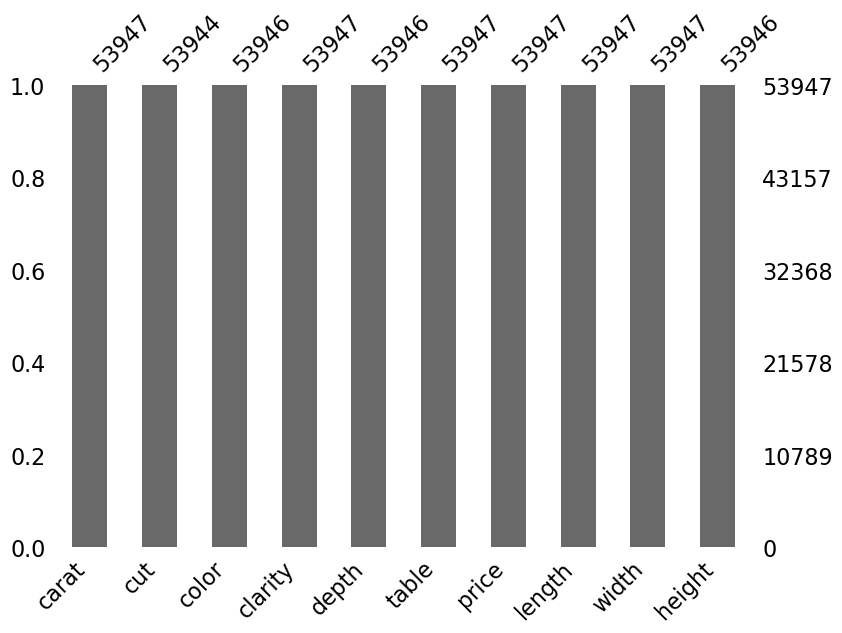

In [126]:
msno.bar(df,figsize=(9,6))

In [127]:
df.isna().sum().reset_index().rename(columns={0:'missing_values'}).sort_values(by='missing_values',ascending=False)

,index,missing_values
1,cut,3
2,color,1
4,depth,1
9,height,1
0,carat,0
3,clarity,0
5,table,0
6,price,0
7,length,0
8,width,0


In [128]:
def missing_ratio(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    return pd.DataFrame({'missing_values': missing, 'ratio': (missing / len(df)) * 100})
missing_df = missing_ratio(df)
missing_df.sort_values(by='ratio', ascending=False)

,missing_values,ratio
cut,3,0.005561
color,1,0.001854
depth,1,0.001854
height,1,0.001854


In [129]:
df.dropna(inplace=True)

In [130]:
df.duplicated().sum()

153

In [131]:
df.drop_duplicates(inplace=True)

In [132]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

## **🔹 Data Cleaning Summary**

    ✏️ Renamed columns for better readability and clarity.

    🗑️ Removed missing values since they were very few and didn’t significantly affect the dataset.

    🔄 Dropped duplicate rows to ensure data uniqueness.

    📏 Updated the height column to have accurate and meaningful values

# **UnderStand Num_Cols** 

In [134]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53788.0,0.797793,0.473414,0.2,0.40,0.70,1.04,5.01
depth,53788.0,61.748076,1.429883,43.0,61.00,61.80,62.50,79.00
table,53788.0,57.458178,2.233732,43.0,56.00,57.00,59.00,95.00
price,53788.0,3933.121477,3988.359598,-200.0,951.00,2401.00,5327.00,18823.00
length,53788.0,5.731222,1.120755,0.0,4.71,5.70,6.54,10.74
width,53788.0,5.734663,1.141270,0.0,4.72,5.71,6.54,58.90
height,53788.0,3.538707,0.705079,0.0,2.91,3.53,4.03,31.80


### **All columns look normal except for the target column, which is the very high std prices. It seems that the values are not naturally balanced and have differences between them.**

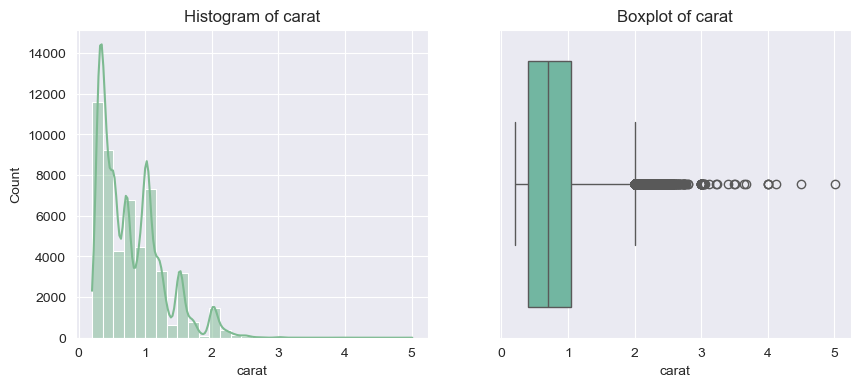

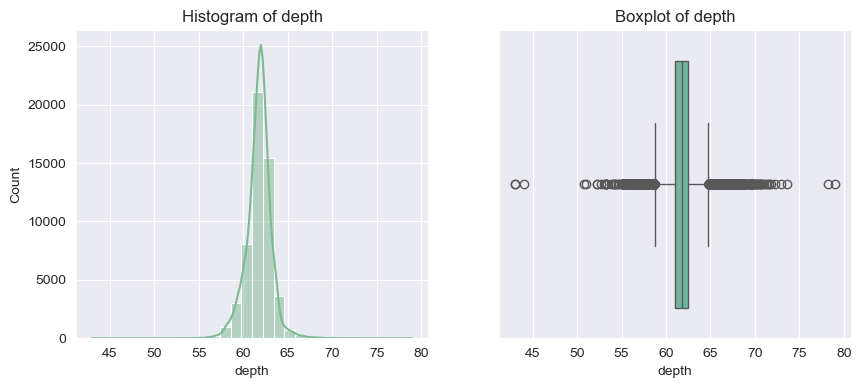

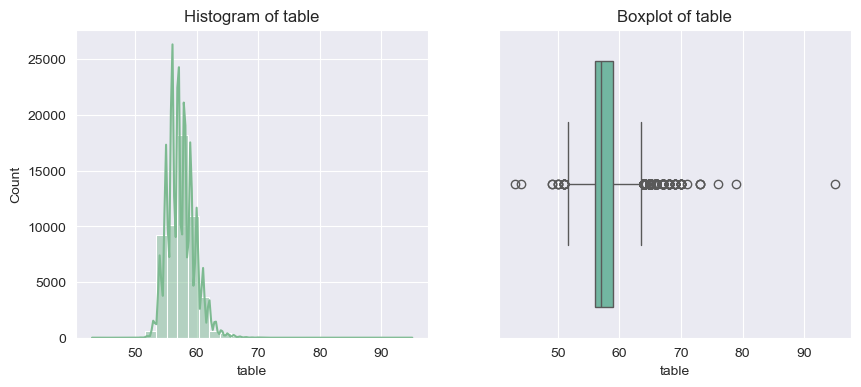

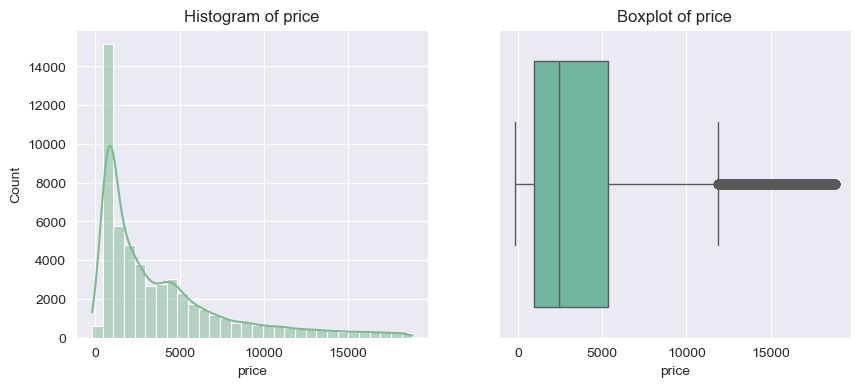

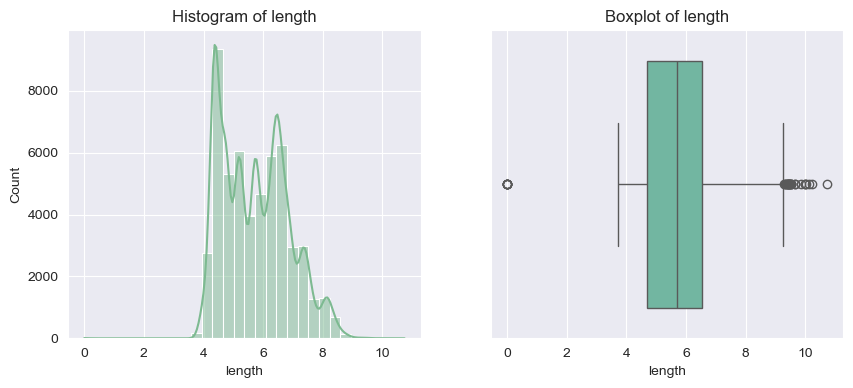

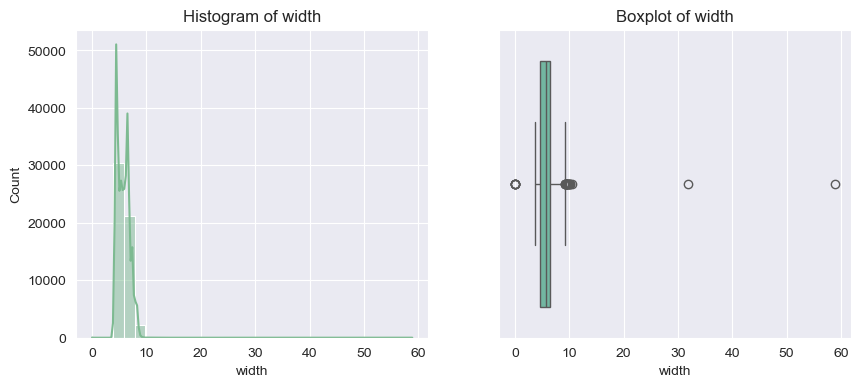

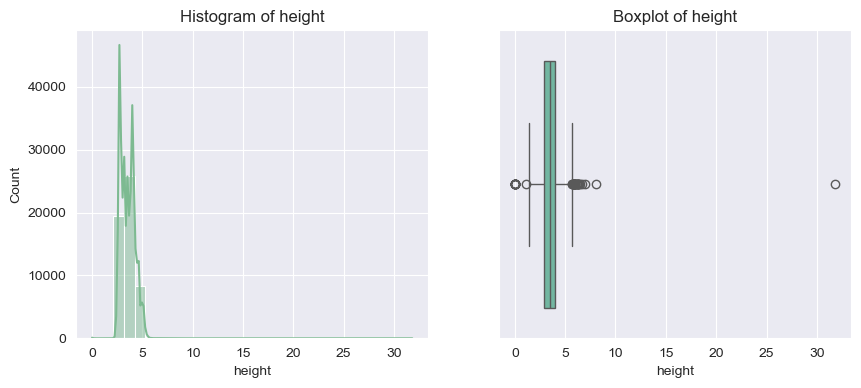

In [141]:
def understand_distribution(df,numeric_cols):
  sns.set_style('darkgrid')
  for col in numeric_cols:
    if col!="Price":
     plt.figure(figsize=(10, 4))
     plt.subplot(1, 2, 1)
     sns.histplot(df[col], kde=True, bins=30,palette='crest')
     plt.title(f'Histogram of {col}')
     plt.subplot(1, 2, 2)
     sns.boxplot(x=df[col], orient='h', palette='Set2')
     plt.title(f'Boxplot of {col}')
     plt.show()
understand_distribution(df,numeric_cols)

In [143]:
def handle_outlier(df, num_cols):
 outlier_report = []
 for col in num_cols:
   if col!='Price':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)]
        n_outliers = outliers.shape[0]

        outlier_report.append({
            'column': col,
            'outliers_found': n_outliers,
            'lower_bound': lower,
            'upper_bound': upper
        })
        df = df[(df[col] >= lower) & (df[col] <= upper)]
        
 report_df = pd.DataFrame(outlier_report)
 return  report_df
handle_outlier(df, numeric_cols)

,column,outliers_found,lower_bound,upper_bound
0,carat,1873,-0.560,2.000
1,depth,2779,59.000,64.600
2,table,342,51.500,63.500
3,price,2362,-5178.500,11049.500
4,length,3,1.990,9.030
5,width,1,1.990,9.030
6,height,8,1.185,5.625


### **💡 **Insight:** Several features, especially `carat`, `depth`, and `price`, contain a high number of outliers. These extreme values may influence model performance but could also represent genuine high-value diamonds. Using scaling methods like `RobustScaler` can help handle these outliers while preserving valuable information.



# **Univarient Analysis**

In [149]:
df['cut']=df['cut'].str.title()

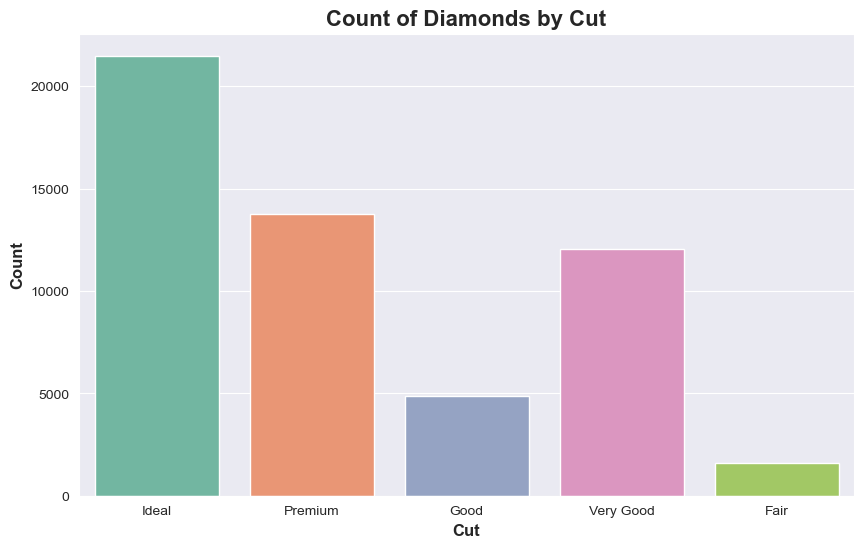

In [151]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cut', palette='Set2')
plt.title('Count of Diamonds by Cut', fontsize=16, fontweight='bold')
plt.xlabel('Cut', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()

### **ideal cut the most cut used**

In [160]:
df=df[df['color']!='87']

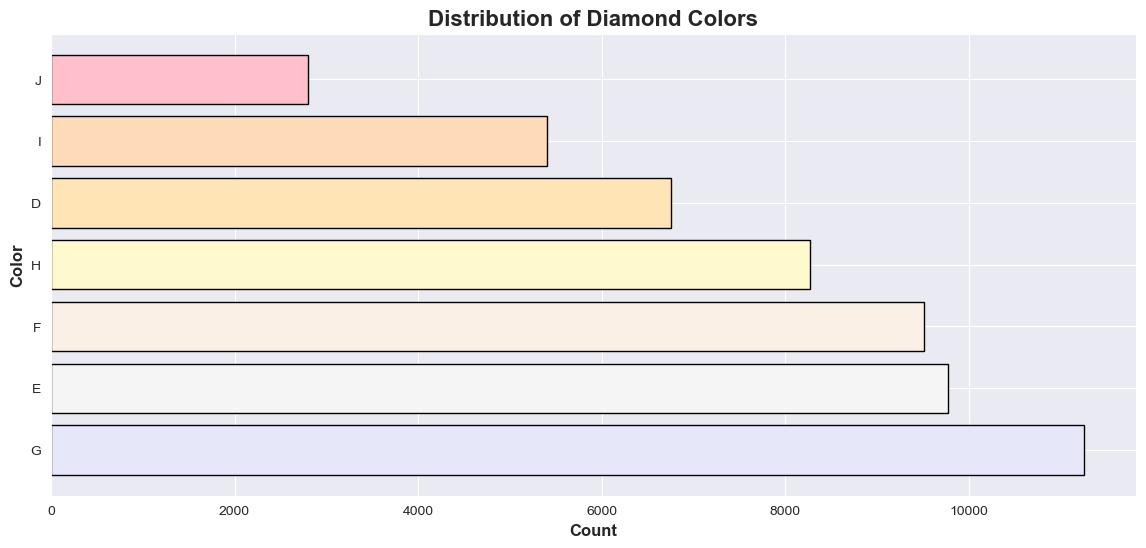

In [167]:
color_count = df['color'].value_counts().reset_index()
colors = [
    "#E6E8FA",
    "#F5F5F5",
    "#FAF0E6",
    "#FFFACD",
    "#FFE4B5",
    "#FFDAB9",
    "#FFC0CB"
]
plt.figure(figsize=(14, 6))
plt.barh(color_count['color'], color_count['count'], color=colors, edgecolor='black')
plt.xlabel('Count', fontsize=12, fontweight='bold')
plt.ylabel('Color', fontsize=12, fontweight='bold')
plt.title('Distribution of Diamond Colors', fontsize=16, fontweight='bold')
plt.show()


### **Gray is the most common color in diamonds.**

In [169]:
df.clarity.value_counts().reset_index().rename(columns={'index':'clarity','clarity':'count'})

,count,count
0,SI1,13029
1,VS2,12227
2,SI2,9150
3,VS1,8152
4,VVS2,5056
5,VVS1,3646
6,IF,1784
7,I1,740
8,8,1
9,7y,1


In [170]:
df['clarity']=df['clarity'].str.title()

In [175]:
df=df[(df['clarity']!='8')&(df['clarity']!='7Y')]
df['clarity']=df['clarity'].str.upper()

In [176]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

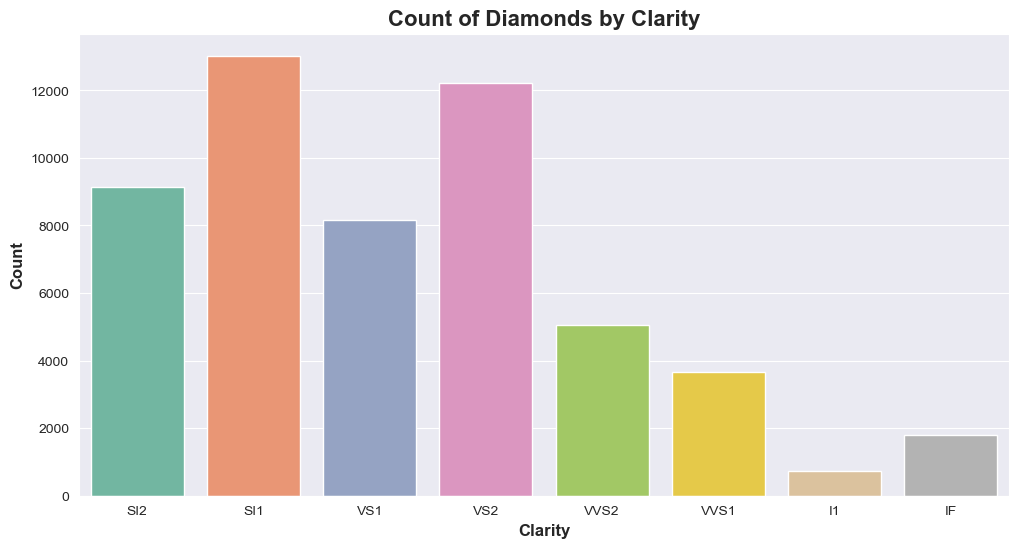

In [177]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='clarity', palette='Set2')
plt.title('Count of Diamonds by Clarity', fontsize=16, fontweight='bold')
plt.xlabel('Clarity', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()

### **S1 was the most common type of purity among all types of diamonds.**

# **Multivarient Analysis**

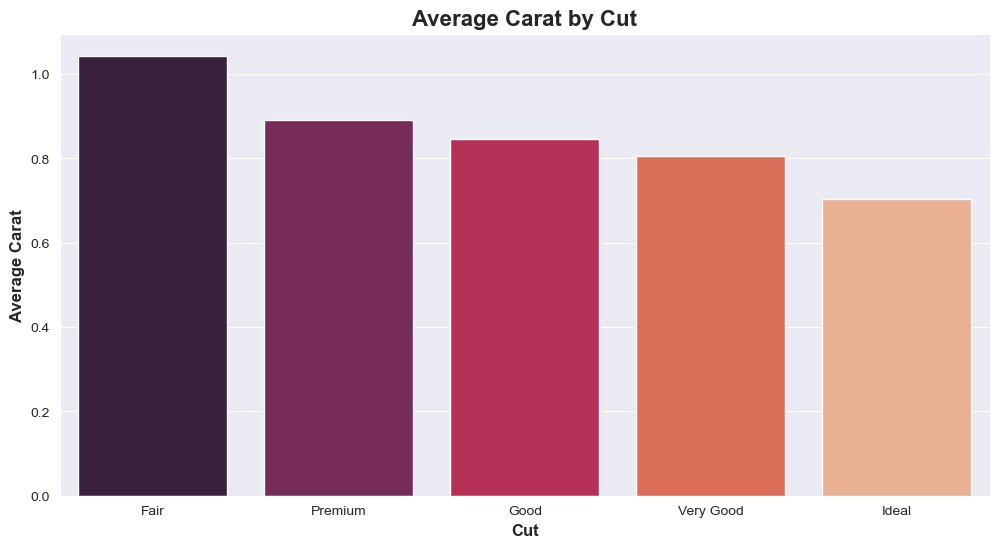

In [186]:
cut_caret=df.groupby('cut')['carat'].mean().reset_index().sort_values(by='carat', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=cut_caret, x='cut', y='carat', palette='rocket')
plt.title('Average Carat by Cut', fontsize=16, fontweight='bold')
plt.xlabel('Cut', fontsize=12, fontweight='bold')
plt.ylabel('Average Carat', fontsize=12, fontweight='bold')
plt.show()

### **Fair is the type with the highest average weights, although it is not the most common column.**

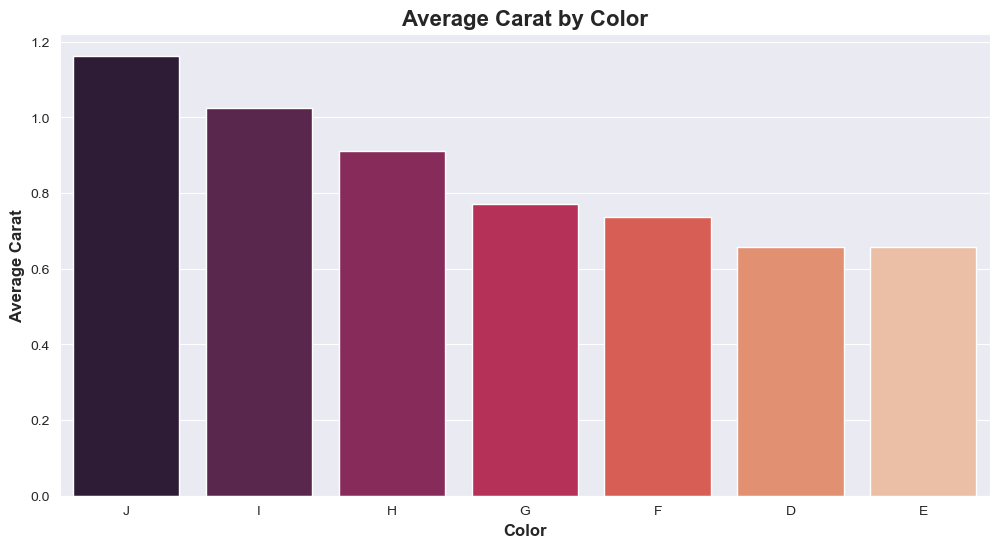

In [187]:
color_carat=df.groupby('color')['carat'].mean().reset_index().sort_values(by='carat', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=color_carat, x='color', y='carat', palette='rocket')
plt.title('Average Carat by Color', fontsize=16, fontweight='bold')
plt.xlabel('Color', fontsize=12, fontweight='bold')
plt.ylabel('Average Carat', fontsize=12, fontweight='bold')
plt.show()

### **j color is the type with the highest average weights**

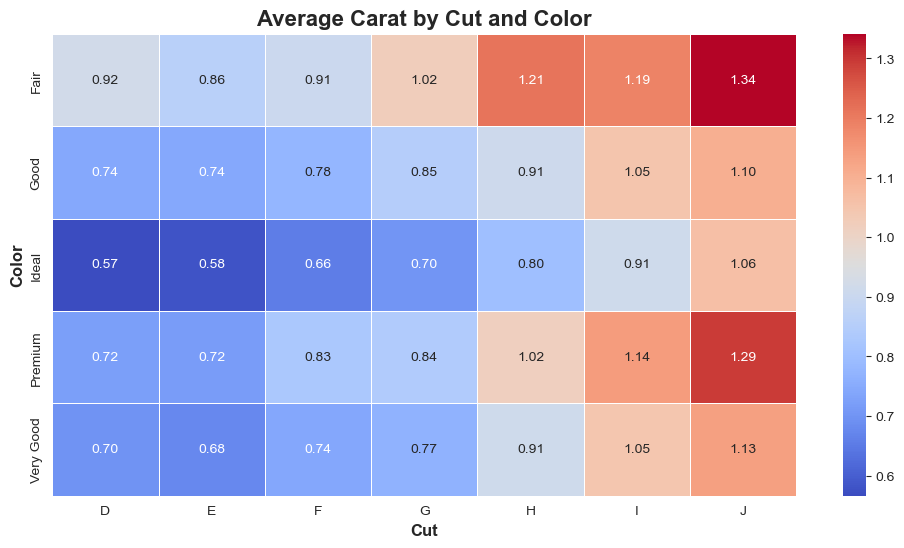

In [189]:
carat_pivottable=df.pivot_table(index='cut', columns='color', values='carat', aggfunc='mean').reset_index() 
plt.figure(figsize=(12, 6))
sns.heatmap(carat_pivottable.set_index('cut'), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Average Carat by Cut and Color', fontsize=16, fontweight='bold')
plt.xlabel('Cut', fontsize=12, fontweight='bold')
plt.ylabel('Color', fontsize=12, fontweight='bold')
plt.show()

### **💎 From my analysis: Larger diamonds 1.3 ct often have lower color grades like J, while the highest color grades like D and E are usually found in smaller stones 0.57 ct. This reflects a trade-off between size and color quality**

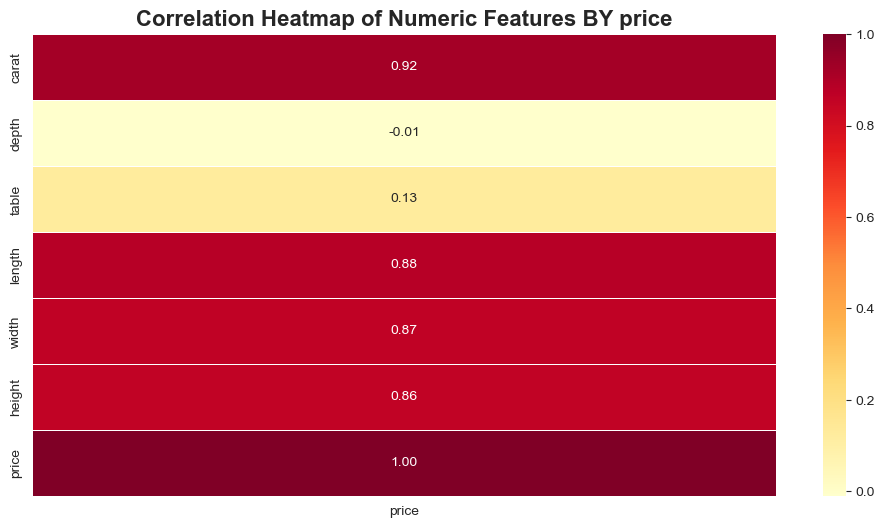

In [201]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[numeric_cols].corr()[['price']], annot=True, cmap='YlOrRd', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numeric Features BY price', fontsize=16, fontweight='bold')
plt.show()

### **The only height column that has a very weak correlation with the price among its columns.**

In [203]:
df.drop(columns=['depth'], inplace=True)

# **Encoding**

In [206]:
cut_ordinal=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_ordinal=['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_ordinal=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
oe=OrdinalEncoder(categories=[cut_ordinal, color_ordinal, clarity_ordinal])
df[['cut', 'color', 'clarity']] = oe.fit_transform(df[['cut', 'color', 'clarity']])

# **TRAIN_TEST_SPLIT**

In [207]:
X=df.drop(columns=['price'])
y=df['price']

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [209]:
num_cols=X.select_dtypes(include=['number']).columns.tolist()
rs=RobustScaler()
processer= ColumnTransformer(
    transformers=[('num', rs, num_cols)],
    remainder='passthrough')
X_train = processer.fit_transform(X_train)
X_test = processer.transform(X_test)

In [216]:
models_params = {
    'LinearRegression': (
        LinearRegression(),
        {'fit_intercept': [True, False], 'positive': [True, False]}
    ),
    'GradientBoosting': (
        GradientBoostingRegressor(random_state=42),
        {'n_estimators': [100, 200],
         'learning_rate': [0.05, 0.1],
         'max_depth': [3, 5]}
    ),
    'XGBoost': (
        XGBRegressor(objective='reg:squarederror', random_state=42),
        {'n_estimators': [100, 200],
         'learning_rate': [0.05, 0.1],
         'max_depth': [3, 5]}
    )
}

results = []
for name, (model, params) in models_params.items():
    grid = GridSearchCV(model, params, cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    train_r2 = r2_score(y_train, best_model.predict(X_train))
    test_r2 = r2_score(y_test, best_model.predict(X_test))

    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Train R²': train_r2,
        'Test R²': test_r2
    })

df_results = pd.DataFrame(results)
df_results.sort_values(by='Test R²', ascending=False, inplace=True)

In [217]:
df_results

,Model,Best Params,Train R²,Test R²
2,XGBoost,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.986233,0.983428
1,GradientBoosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.987773,0.983060
0,LinearRegression,"{'fit_intercept': True, 'positive': False}",0.904649,0.914597


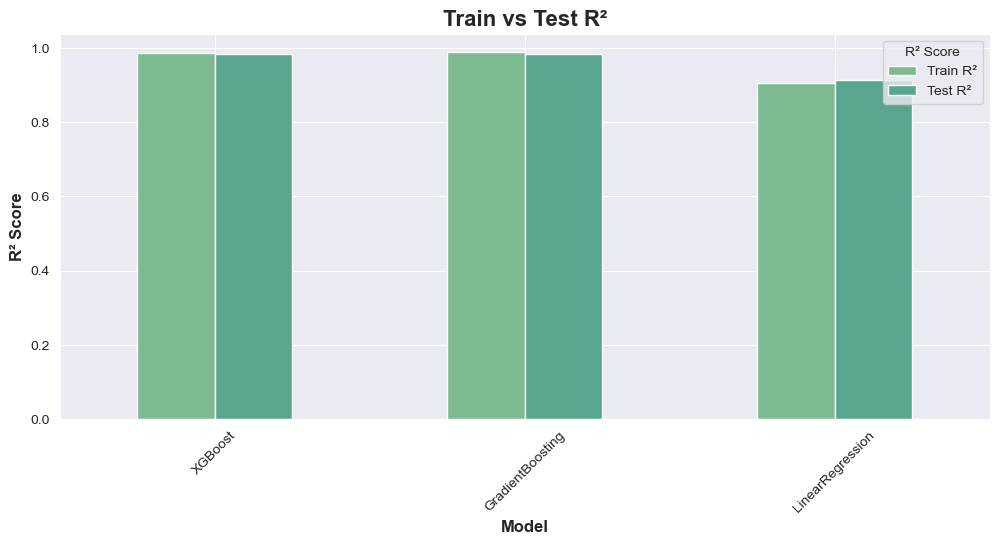

In [224]:
df_results.plot(x='Model', y=['Train R²', 'Test R²'], kind='bar', figsize=(12,5))
plt.ylabel('R² Score')
plt.title('Train vs Test R²',fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='R² Score')
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('R² Score', fontsize=12, fontweight='bold')
plt.show()

In [ ]:
model=XGBRegressor( random_state=42, n_estimators=200, learning_rate=0.1, max_depth=5,n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train= model.predict(X_train)
print("Test R²:", r2_score(y_test, y_pred))
print("Train R²:", r2_score(y_train, y_pred_train))
print("Test mse:", mean_squared_error(y_train, y_pred))
print("Train mse:", mean_squared_error(y_train, y_pred_train))
print("Test mae:", mean_squared_error(y_train, y_pred))
print("Train mae:", mean_squared_error(y_train, y_pred_train))
print("Test rmse:", root_mean_squared_error(y_train, y_pred))
print("Train rmse:", root_mean_squared_error(y_train, y_pred_train))

Test R²: 0.9834277629852295
Train R²: 0.986233115196228


# **Save Model**

In [ ]:
joblib.dump(model, 'dimond_price.pkl')
joblib.dump(processer, 'scaler.pkl')
joblib.dump(oe,'OrdinalEncoder.pkl')

['OrdinalEncoder.pkl']

# **Fake Data for predict**

In [233]:
model=joblib.load('dimond_price.pkl')
oe=joblib.load('OrdinalEncoder.pkl')
processer=joblib.load('scaler.pkl')
new_data = pd.DataFrame([['Premium', 'G', 'VS2', 61.5, 55.0, 1.45, 6.85, 6.80, 4.15]],
                        columns=['cut', 'color', 'clarity', 'depth', 'table', 'carat', 'length', 'width', 'height'])
new_data[['cut', 'color', 'clarity']] = oe.transform(new_data[['cut', 'color', 'clarity']])
new_data=processer.transform(new_data)

# **Use Model**

In [235]:
prediction_dimond_price=model.predict(new_data)
print(prediction_dimond_price[0])

8278.828


# **Thank you 😇  — Nour Ahmed Farouk**
